In [2]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV


from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [5]:
df = pd.read_csv("ready_to_model.csv")

In [6]:
df.shape

(19165, 72)

In [4]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,foot_right,first_position_g_1,first_position_g_2,new_age_cat_Young Talent,new_age_cat_Mature Players,new_age_cat_Exp.Players,new_age_cat_Veteran,release_clause_eur_cat_Low_Release_Eur,release_clause_eur_cat_Average_Release_Eur,release_clause_eur_cat_High_Release_Eur,league_group_top_7_league,league_group_top_8_18_league,work_rate_cat_Low_Work_Rate,work_rate_cat_Medium_Work_Rate
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,1.0,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,1,0,1,0
1,Robert Lewandowski,92,92,119500000.0,270000.0,1.0,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,1.0,1.0,0.0,0,0,1,0,0,0,1,1,0,0,0
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,1.0,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,1.0,1.0,0.0,0,0,0,1,0,0,1,1,0,0,1
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,1.0,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,1.0,0.0,1.0,0,1,0,0,0,0,1,1,0,0,0
4,Kevin De Bruyne,91,91,125500000.0,350000.0,1.0,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,1.0,1.0,0.0,0,1,0,0,0,0,1,1,0,0,0


In [5]:
df.reset_index(drop=True,inplace=True)

In [18]:
X = df.drop(["long_name","value_eur",'skill_moves', 'multi_position', 'goalkeeper', 'Both_Foot', 'Face',
       'foot_right', 'first_position_g_1', 'first_position_g_2',
       'league_group_top_7_league', 'league_group_top_8_18_league'],axis=1)
y = df["value_eur"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y_train = np.log10(y_train)

In [97]:
models = {'Lasso': {'model': Lasso(random_state = 42)},
          'LinearRegression': {'model': LinearRegression()},
          #'Ridge': {'model': Ridge(random_state = 42)},
          #'ElasticNet': {'model': ElasticNet(random_state = 42)},
          #'KNeighborsRegressor': {'model': KNeighborsRegressor()},
          #'RandomForestRegressor': {'model': RandomForestRegressor(random_state = 42)},
          #'GradientBoostingRegressor': {'model': GradientBoostingRegressor(random_state = 42)},
          #"AdaBoostRegressor': {'model': AdaBoostRegressor(random_state = 42)},
          #'DecisionTreeRegressor': {'model': DecisionTreeRegressor(random_state = 42)},
          'XGB': {'model': XGBRegressor(random_state=42, eval_metric='logloss')},
          'LightGBM': {'model': LGBMRegressor(random_state=42, verbose=-1)},
          'CatBoost': {'model': CatBoostRegressor(random_state=42, verbose=False)}}

In [98]:
results_df = pd.DataFrame(data=[], columns=["model","cv_mape"])
index=0
for model_name, model in models.items():
    model=model["model"]
    print(f"Cross-validating {model_name}...")
    cross_validate_results = cross_validate(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_percentage_error')
    test_results_mean = cross_validate_results["test_score"].mean()*-100
    results_df.loc[index,:] = [model_name,test_results_mean]
    index+=1


Cross-validating Lasso...
Cross-validating LinearRegression...
Cross-validating XGB...
Cross-validating LightGBM...
Cross-validating CatBoost...


In [99]:
results_df

,model,cv_mape
0,Lasso,3.247219
1,LinearRegression,1.022319
2,XGB,0.590607
3,LightGBM,0.578329
4,CatBoost,0.55614


In [100]:
y_train.mean()

6.0302749434959395

In [7]:
LightGBM_model = LGBMRegressor(random_state=42).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 15332, number of used features: 60
[LightGBM] [Info] Start training from score 6.030275


In [102]:
y_test_pred = 10**(LightGBM_model.predict(X_test))

In [103]:
metrics.mean_absolute_percentage_error(y_test,y_test_pred) * 100

7.789076424504874

In [104]:
y_train_pred = 10**(LightGBM_model.predict(X_train))

In [105]:
metrics.mean_absolute_percentage_error(10**y_train,y_train_pred) * 100

6.318236417787364

# Hiperparametre Opt.

In [8]:
model_parametreleri = LightGBM_model.get_params()

In [9]:
model_parametreleri

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [61]:
def optimize_hyperparameters(X, y,n_trials=100):
    """
    Optimize hyperparameters for a regression problem using Optuna.

    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.

    Returns:
        dict: Best hyperparameters.
    """
    def objective(trial):
        # Split data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        y_train = np.log10(y_train)
        y_val = np.log10(y_val)
        # Define hyperparameters to optimize
        params = {
            'objective': 'regression',  # Regression task
            'metric': 'rmse',  # Root Mean Squared Error
            'boosting_type': 'gbdt',
            'learning_rate': trial.suggest_float("learning_rate", 0.00001, 1, log=True),
            'n_estimators': trial.suggest_int("n_estimators", 10, 2000),  
            'num_leaves': trial.suggest_int("num_leaves", 5, 250), 
            'max_depth': trial.suggest_int("max_depth", -1, 50),  
            'subsample': trial.suggest_float("subsample", 0.01, 1), 
            'colsample_bytree': trial.suggest_float("colsample_bytree", 0.01, 1), 
            #'reg_alpha': trial.suggest_float("reg_alpha", 0.01, 1),
            #'reg_lambda': trial.suggest_float("reg_lambda", 0.01, 1),
            #'min_child_weight': trial.suggest_float("min_child_weight", 0.01, 1),
            'min_child_samples': trial.suggest_int("min_child_samples", 5, 200)
        }

        # Initialize and train the model
        model = LGBMRegressor(verbose=-1,**params)
        model.fit(X_train, y_train, eval_set=[(X_val,y_val)])

        # Make predictions on validation set
        y_pred = 10**model.predict(X_test)

        # Calculate mean squared error (MSE)
        mape = metrics.mean_absolute_percentage_error(y_test, y_pred)*100

        return mape

    # Create a study object and optimize
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)

    # Get the best hyperparameters
    best_params = study.best_params
    return best_params

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_hyperparams = optimize_hyperparameters(X_train, y_train)
print("Best hyperparameters:", best_hyperparams) 

[I 2023-12-23 18:05:59,094] A new study created in memory with name: no-name-dfff9047-956a-4e01-b151-0034b5a7742e
[I 2023-12-23 18:05:59,940] Trial 0 finished with value: 10.708348094070134 and parameters: {'learning_rate': 0.5755081543781866, 'n_estimators': 559, 'num_leaves': 15, 'max_depth': 13, 'subsample': 0.8183748706742091, 'colsample_bytree': 0.28587392804011613, 'reg_alpha': 0.9584170674666933, 'reg_lambda': 0.6806040738692037, 'min_child_weight': 0.4753576681926444, 'min_child_samples': 8}. Best is trial 0 with value: 10.708348094070134.
[I 2023-12-23 18:06:00,243] Trial 1 finished with value: 11.79795579411465 and parameters: {'learning_rate': 0.6966265035968395, 'n_estimators': 99, 'num_leaves': 13, 'max_depth': 0, 'subsample': 0.8013796273476717, 'colsample_bytree': 0.30993993416430643, 'reg_alpha': 0.529783451023333, 'reg_lambda': 0.6880383010694409, 'min_child_weight': 0.8036029074131454, 'min_child_samples': 63}. Best is trial 0 with value: 10.708348094070134.
[I 2023-1

[I 2023-12-23 18:06:32,077] Trial 19 finished with value: 16.19845119201053 and parameters: {'learning_rate': 0.9227513128228426, 'n_estimators': 65, 'num_leaves': 90, 'max_depth': 16, 'subsample': 0.2306901194737326, 'colsample_bytree': 0.6808994225495383, 'reg_alpha': 0.9483199736608785, 'reg_lambda': 0.11992704970787849, 'min_child_weight': 0.6018586997292951, 'min_child_samples': 63}. Best is trial 12 with value: 8.082026065022324.
[I 2023-12-23 18:06:34,746] Trial 20 finished with value: 8.437191524958429 and parameters: {'learning_rate': 0.1439820631563238, 'n_estimators': 726, 'num_leaves': 55, 'max_depth': 20, 'subsample': 0.33333795225309204, 'colsample_bytree': 0.9192223958522635, 'reg_alpha': 0.5550985118194988, 'reg_lambda': 0.34273920672020586, 'min_child_weight': 0.231300737999123, 'min_child_samples': 80}. Best is trial 12 with value: 8.082026065022324.
[I 2023-12-23 18:06:37,741] Trial 21 finished with value: 42.93054262745745 and parameters: {'learning_rate': 0.0015450

[I 2023-12-23 18:07:25,572] Trial 38 finished with value: 8.66835845440814 and parameters: {'learning_rate': 0.07533634435943165, 'n_estimators': 700, 'num_leaves': 63, 'max_depth': 6, 'subsample': 0.8723861908410279, 'colsample_bytree': 0.47811842608705735, 'reg_alpha': 0.43012171303738883, 'reg_lambda': 0.7181319837529672, 'min_child_weight': 0.5635956362800516, 'min_child_samples': 83}. Best is trial 29 with value: 8.039134925760967.
[I 2023-12-23 18:07:28,099] Trial 39 finished with value: 8.740100241469467 and parameters: {'learning_rate': 0.1846741284562281, 'n_estimators': 862, 'num_leaves': 20, 'max_depth': 9, 'subsample': 0.45432941400033455, 'colsample_bytree': 0.9469515233808048, 'reg_alpha': 0.17232562237882715, 'reg_lambda': 0.09798179445263994, 'min_child_weight': 0.7642622200978192, 'min_child_samples': 86}. Best is trial 29 with value: 8.039134925760967.
[I 2023-12-23 18:07:29,358] Trial 40 finished with value: 9.30544424866894 and parameters: {'learning_rate': 0.469693

[I 2023-12-23 18:08:30,618] Trial 57 finished with value: 7.377363614728316 and parameters: {'learning_rate': 0.02787544982275352, 'n_estimators': 995, 'num_leaves': 89, 'max_depth': 12, 'subsample': 0.8080703684912252, 'colsample_bytree': 0.7247440611644147, 'reg_alpha': 0.6125917171461459, 'reg_lambda': 0.9785066191696112, 'min_child_weight': 0.04068121197531687, 'min_child_samples': 12}. Best is trial 52 with value: 7.283930901900408.
[I 2023-12-23 18:08:36,408] Trial 58 finished with value: 7.556402092042614 and parameters: {'learning_rate': 0.03420825375423057, 'n_estimators': 895, 'num_leaves': 90, 'max_depth': 12, 'subsample': 0.8489977670865824, 'colsample_bytree': 0.7666014940346964, 'reg_alpha': 0.8156700142839305, 'reg_lambda': 0.9929878237601939, 'min_child_weight': 0.010400045576186737, 'min_child_samples': 12}. Best is trial 52 with value: 7.283930901900408.
[I 2023-12-23 18:08:41,647] Trial 59 finished with value: 8.147921206720746 and parameters: {'learning_rate': 0.041

[I 2023-12-23 18:10:04,796] Trial 76 finished with value: 7.679453999774591 and parameters: {'learning_rate': 0.14959708049920356, 'n_estimators': 974, 'num_leaves': 87, 'max_depth': 15, 'subsample': 0.9650043315437843, 'colsample_bytree': 0.8576839249734403, 'reg_alpha': 0.630025886861111, 'reg_lambda': 0.77341338394843, 'min_child_weight': 0.3307863199799992, 'min_child_samples': 15}. Best is trial 52 with value: 7.283930901900408.
[I 2023-12-23 18:10:08,105] Trial 77 finished with value: 7.68321279351848 and parameters: {'learning_rate': 0.10171945892784556, 'n_estimators': 959, 'num_leaves': 97, 'max_depth': 14, 'subsample': 0.7473110575005416, 'colsample_bytree': 0.8891493142730985, 'reg_alpha': 0.8772184716986975, 'reg_lambda': 0.8492825539187108, 'min_child_weight': 0.045692620425450456, 'min_child_samples': 18}. Best is trial 52 with value: 7.283930901900408.
[I 2023-12-23 18:10:17,589] Trial 78 finished with value: 68.23103813237284 and parameters: {'learning_rate': 0.00052280

[I 2023-12-23 18:11:28,777] Trial 95 finished with value: 7.213983658591372 and parameters: {'learning_rate': 0.05897882947261402, 'n_estimators': 274, 'num_leaves': 74, 'max_depth': 17, 'subsample': 0.15790846420092736, 'colsample_bytree': 0.9551496205905319, 'reg_alpha': 0.5715213688997953, 'reg_lambda': 0.6960472367931444, 'min_child_weight': 0.45226457919060936, 'min_child_samples': 11}. Best is trial 95 with value: 7.213983658591372.
[I 2023-12-23 18:11:31,158] Trial 96 finished with value: 7.236215790399136 and parameters: {'learning_rate': 0.058213778154543296, 'n_estimators': 275, 'num_leaves': 75, 'max_depth': 17, 'subsample': 0.15553323680839068, 'colsample_bytree': 0.9663332715202495, 'reg_alpha': 0.5645559026254968, 'reg_lambda': 0.7458804771703975, 'min_child_weight': 0.3994396062024318, 'min_child_samples': 7}. Best is trial 95 with value: 7.213983658591372.
[I 2023-12-23 18:11:33,992] Trial 97 finished with value: 7.199968002068731 and parameters: {'learning_rate': 0.054

Best hyperparameters: {'learning_rate': 0.05487279936630068, 'n_estimators': 271, 'num_leaves': 74, 'max_depth': 17, 'subsample': 0.15846993017629635, 'colsample_bytree': 0.9775948545850086, 'reg_alpha': 0.5448603850291515, 'reg_lambda': 0.7488083852966542, 'min_child_weight': 0.45070102805429624, 'min_child_samples': 11}


In [56]:
best_hyper_params_1 = best_hyperparams

In [57]:
best_hyper_params_1

{'learning_rate': 0.05487279936630068,
 'n_estimators': 271,
 'num_leaves': 74,
 'max_depth': 17,
 'subsample': 0.15846993017629635,
 'colsample_bytree': 0.9775948545850086,
 'reg_alpha': 0.5448603850291515,
 'reg_lambda': 0.7488083852966542,
 'min_child_weight': 0.45070102805429624,
 'min_child_samples': 11}

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_hyperparams = optimize_hyperparameters(X_train, y_train,n_trials=1000)
print("Best hyperparameters:", best_hyperparams) 

[I 2023-12-23 18:18:35,296] A new study created in memory with name: no-name-33525a74-4954-4b24-9e8a-6b0f29336c90
[I 2023-12-23 18:18:39,899] Trial 0 finished with value: 9.014086101172056 and parameters: {'learning_rate': 0.028993820693975818, 'n_estimators': 1336, 'num_leaves': 36, 'max_depth': 34, 'subsample': 0.03280661968863122, 'colsample_bytree': 0.45158282578116876, 'reg_alpha': 0.22842461205914416, 'reg_lambda': 0.07485006154670082, 'min_child_weight': 0.9045888783330276, 'min_child_samples': 159}. Best is trial 0 with value: 9.014086101172056.
[I 2023-12-23 18:18:49,650] Trial 1 finished with value: 8.039325449673813 and parameters: {'learning_rate': 0.004017416114717384, 'n_estimators': 1374, 'num_leaves': 113, 'max_depth': 49, 'subsample': 0.6433484817309846, 'colsample_bytree': 0.8916677260243676, 'reg_alpha': 0.6691580707522005, 'reg_lambda': 0.39926788936668794, 'min_child_weight': 0.9208305816963257, 'min_child_samples': 68}. Best is trial 1 with value: 8.03932544967381

[I 2023-12-23 18:21:20,210] Trial 19 finished with value: 126.67712127378879 and parameters: {'learning_rate': 3.3610130717148374e-05, 'n_estimators': 1181, 'num_leaves': 88, 'max_depth': 37, 'subsample': 0.8200032462400502, 'colsample_bytree': 0.8031205842029853, 'reg_alpha': 0.3385507122192249, 'reg_lambda': 0.9743016266052511, 'min_child_weight': 0.6379026773340246, 'min_child_samples': 102}. Best is trial 1 with value: 8.039325449673813.
[I 2023-12-23 18:21:22,441] Trial 20 finished with value: 11.206966233683179 and parameters: {'learning_rate': 0.8075011211317898, 'n_estimators': 1686, 'num_leaves': 147, 'max_depth': -1, 'subsample': 0.9559451674153824, 'colsample_bytree': 0.9126577859406074, 'reg_alpha': 0.8474227620378421, 'reg_lambda': 0.35787115315018997, 'min_child_weight': 0.9955532329936411, 'min_child_samples': 65}. Best is trial 1 with value: 8.039325449673813.
[I 2023-12-23 18:21:26,858] Trial 21 finished with value: 8.161811628737283 and parameters: {'learning_rate': 0

[I 2023-12-23 18:22:45,350] Trial 38 finished with value: 20.226630784444712 and parameters: {'learning_rate': 0.1422763727096472, 'n_estimators': 1018, 'num_leaves': 106, 'max_depth': 10, 'subsample': 0.2180981702292122, 'colsample_bytree': 0.01624449447090509, 'reg_alpha': 0.09949189705458877, 'reg_lambda': 0.036008759861445305, 'min_child_weight': 0.903752208530723, 'min_child_samples': 43}. Best is trial 1 with value: 8.039325449673813.
[I 2023-12-23 18:22:48,008] Trial 39 finished with value: 8.4548145974231 and parameters: {'learning_rate': 0.0099106133218052, 'n_estimators': 742, 'num_leaves': 27, 'max_depth': 40, 'subsample': 0.25191638801625504, 'colsample_bytree': 0.8628211287939851, 'reg_alpha': 0.5094117843749194, 'reg_lambda': 0.6725128119616499, 'min_child_weight': 0.8653529360972189, 'min_child_samples': 89}. Best is trial 1 with value: 8.039325449673813.
[I 2023-12-23 18:22:52,625] Trial 40 finished with value: 26.983836563822994 and parameters: {'learning_rate': 0.0013

[I 2023-12-23 18:24:02,075] Trial 57 finished with value: 8.074452919416258 and parameters: {'learning_rate': 0.017473835025022526, 'n_estimators': 931, 'num_leaves': 69, 'max_depth': 22, 'subsample': 0.14504322189686655, 'colsample_bytree': 0.9381905969811078, 'reg_alpha': 0.8855512673937955, 'reg_lambda': 0.40314814732996457, 'min_child_weight': 0.57984527092569, 'min_child_samples': 117}. Best is trial 49 with value: 7.783073126238095.
[I 2023-12-23 18:24:03,256] Trial 58 finished with value: 9.172381099702235 and parameters: {'learning_rate': 0.2604225269041858, 'n_estimators': 595, 'num_leaves': 92, 'max_depth': 6, 'subsample': 0.09941796618512112, 'colsample_bytree': 0.8890742400685153, 'reg_alpha': 0.9713411988094867, 'reg_lambda': 0.07248031002823935, 'min_child_weight': 0.5210017369946682, 'min_child_samples': 102}. Best is trial 49 with value: 7.783073126238095.
[I 2023-12-23 18:24:05,175] Trial 59 finished with value: 7.940091250511223 and parameters: {'learning_rate': 0.040

[I 2023-12-23 18:24:40,642] Trial 76 finished with value: 7.928024390516273 and parameters: {'learning_rate': 0.05873414452317671, 'n_estimators': 1301, 'num_leaves': 142, 'max_depth': 8, 'subsample': 0.067841453628201, 'colsample_bytree': 0.745734783743665, 'reg_alpha': 0.8210666994478822, 'reg_lambda': 0.45222613801007877, 'min_child_weight': 0.49779885469074636, 'min_child_samples': 39}. Best is trial 73 with value: 7.751147229884987.
[I 2023-12-23 18:24:41,271] Trial 77 finished with value: 10.072297330992361 and parameters: {'learning_rate': 0.5090872195387773, 'n_estimators': 96, 'num_leaves': 95, 'max_depth': 10, 'subsample': 0.15990198665389574, 'colsample_bytree': 0.7833073068622868, 'reg_alpha': 0.9208038903323418, 'reg_lambda': 0.298473828456709, 'min_child_weight': 0.6171349824957411, 'min_child_samples': 30}. Best is trial 73 with value: 7.751147229884987.
[I 2023-12-23 18:24:43,380] Trial 78 finished with value: 8.524862172273961 and parameters: {'learning_rate': 0.069631

[I 2023-12-23 18:26:50,491] Trial 95 finished with value: 7.5175921975089866 and parameters: {'learning_rate': 0.006766590317702718, 'n_estimators': 1644, 'num_leaves': 208, 'max_depth': 18, 'subsample': 0.31900976591671054, 'colsample_bytree': 0.9448019246709659, 'reg_alpha': 0.6246497122191609, 'reg_lambda': 0.2249651059675737, 'min_child_weight': 0.6889620773672005, 'min_child_samples': 50}. Best is trial 95 with value: 7.5175921975089866.
[I 2023-12-23 18:26:58,891] Trial 96 finished with value: 9.361028767453524 and parameters: {'learning_rate': 0.002305130061169099, 'n_estimators': 1443, 'num_leaves': 205, 'max_depth': 21, 'subsample': 0.3321790058938051, 'colsample_bytree': 0.9394178821730831, 'reg_alpha': 0.6272059848274933, 'reg_lambda': 0.12191822905487741, 'min_child_weight': 0.6978173501168696, 'min_child_samples': 52}. Best is trial 95 with value: 7.5175921975089866.
[I 2023-12-23 18:27:08,124] Trial 97 finished with value: 7.664147220252844 and parameters: {'learning_rate

[I 2023-12-23 18:30:18,807] Trial 114 finished with value: 7.407484138203459 and parameters: {'learning_rate': 0.006796476101761266, 'n_estimators': 1839, 'num_leaves': 200, 'max_depth': 17, 'subsample': 0.3593661491727242, 'colsample_bytree': 0.9025273184997592, 'reg_alpha': 0.7252899879028203, 'reg_lambda': 0.09516335135825543, 'min_child_weight': 0.80104535798798, 'min_child_samples': 33}. Best is trial 114 with value: 7.407484138203459.
[I 2023-12-23 18:30:30,973] Trial 115 finished with value: 7.389208523848796 and parameters: {'learning_rate': 0.0061906736673213005, 'n_estimators': 1846, 'num_leaves': 178, 'max_depth': 18, 'subsample': 0.3580088142054846, 'colsample_bytree': 0.90275758904094, 'reg_alpha': 0.7157259801283645, 'reg_lambda': 0.10061856170273303, 'min_child_weight': 0.8012701709683484, 'min_child_samples': 32}. Best is trial 115 with value: 7.389208523848796.
[I 2023-12-23 18:30:42,457] Trial 116 finished with value: 7.545973150355047 and parameters: {'learning_rate'

[I 2023-12-23 18:34:05,724] Trial 133 finished with value: 7.2482045995669235 and parameters: {'learning_rate': 0.006963516938855814, 'n_estimators': 1667, 'num_leaves': 166, 'max_depth': 13, 'subsample': 0.38026936692842217, 'colsample_bytree': 0.8859850588468525, 'reg_alpha': 0.7691574601847033, 'reg_lambda': 0.12741296332988838, 'min_child_weight': 0.8642155946682883, 'min_child_samples': 14}. Best is trial 127 with value: 7.173763334253293.
[I 2023-12-23 18:34:15,073] Trial 134 finished with value: 7.285824282985476 and parameters: {'learning_rate': 0.017373954633138598, 'n_estimators': 1670, 'num_leaves': 164, 'max_depth': 13, 'subsample': 0.3376060696451668, 'colsample_bytree': 0.8645312805802055, 'reg_alpha': 0.7606008468269172, 'reg_lambda': 0.12083277855070973, 'min_child_weight': 0.8591682307442422, 'min_child_samples': 11}. Best is trial 127 with value: 7.173763334253293.
[I 2023-12-23 18:34:26,106] Trial 135 finished with value: 7.329512961099162 and parameters: {'learning_

[I 2023-12-23 18:37:02,239] Trial 152 finished with value: 7.464894932360605 and parameters: {'learning_rate': 0.016232870183584852, 'n_estimators': 1611, 'num_leaves': 171, 'max_depth': 10, 'subsample': 0.36662327651544246, 'colsample_bytree': 0.829818019351563, 'reg_alpha': 0.7538934303584116, 'reg_lambda': 0.035797553402283425, 'min_child_weight': 0.8620969506498501, 'min_child_samples': 23}. Best is trial 127 with value: 7.173763334253293.
[I 2023-12-23 18:37:08,189] Trial 153 finished with value: 7.33554263231124 and parameters: {'learning_rate': 0.022878791929575034, 'n_estimators': 1627, 'num_leaves': 154, 'max_depth': 8, 'subsample': 0.29418267550196486, 'colsample_bytree': 0.8685675552234793, 'reg_alpha': 0.7694199372454439, 'reg_lambda': 0.19089646269372296, 'min_child_weight': 0.8256924661147864, 'min_child_samples': 11}. Best is trial 127 with value: 7.173763334253293.
[I 2023-12-23 18:37:13,689] Trial 154 finished with value: 7.244111529027383 and parameters: {'learning_ra

[I 2023-12-23 18:40:02,188] Trial 171 finished with value: 6.867413147699311 and parameters: {'learning_rate': 0.04732126366289882, 'n_estimators': 1411, 'num_leaves': 131, 'max_depth': 15, 'subsample': 0.2531530752387775, 'colsample_bytree': 0.9417420705339765, 'reg_alpha': 0.057665960220233646, 'reg_lambda': 0.03330081751709898, 'min_child_weight': 0.7809069869915941, 'min_child_samples': 5}. Best is trial 156 with value: 6.827483565425403.
[I 2023-12-23 18:40:12,271] Trial 172 finished with value: 6.888241981710635 and parameters: {'learning_rate': 0.04706890975771892, 'n_estimators': 1412, 'num_leaves': 131, 'max_depth': 15, 'subsample': 0.25196734621458955, 'colsample_bytree': 0.9443926653232664, 'reg_alpha': 0.05547449296834058, 'reg_lambda': 0.03164264373042676, 'min_child_weight': 0.7810792545568278, 'min_child_samples': 5}. Best is trial 156 with value: 6.827483565425403.
[I 2023-12-23 18:40:22,272] Trial 173 finished with value: 7.022018239005274 and parameters: {'learning_ra

[I 2023-12-23 18:43:04,787] Trial 190 finished with value: 6.942122351594662 and parameters: {'learning_rate': 0.03721411066021499, 'n_estimators': 1484, 'num_leaves': 125, 'max_depth': 12, 'subsample': 0.23262379775093062, 'colsample_bytree': 0.9425977962625379, 'reg_alpha': 0.03494157286553751, 'reg_lambda': 0.04911905143899055, 'min_child_weight': 0.7326710873934694, 'min_child_samples': 16}. Best is trial 156 with value: 6.827483565425403.
[I 2023-12-23 18:43:15,522] Trial 191 finished with value: 6.872092724849703 and parameters: {'learning_rate': 0.043770796726556635, 'n_estimators': 1369, 'num_leaves': 121, 'max_depth': 14, 'subsample': 0.26488318487994633, 'colsample_bytree': 0.9619105785836297, 'reg_alpha': 0.051022562037938035, 'reg_lambda': 0.01033765394370732, 'min_child_weight': 0.8014566158673838, 'min_child_samples': 5}. Best is trial 156 with value: 6.827483565425403.
[I 2023-12-23 18:43:25,298] Trial 192 finished with value: 6.926969734956702 and parameters: {'learning

[I 2023-12-23 18:46:03,439] Trial 209 finished with value: 7.0582094666897826 and parameters: {'learning_rate': 0.06526097186357147, 'n_estimators': 1333, 'num_leaves': 135, 'max_depth': 12, 'subsample': 0.17425775374582617, 'colsample_bytree': 0.9997692874100829, 'reg_alpha': 0.14059253159110738, 'reg_lambda': 0.07203601199944992, 'min_child_weight': 0.7817625759083814, 'min_child_samples': 14}. Best is trial 194 with value: 6.827219237414386.
[I 2023-12-23 18:46:15,621] Trial 210 finished with value: 6.949654199151202 and parameters: {'learning_rate': 0.04847866491266944, 'n_estimators': 1492, 'num_leaves': 133, 'max_depth': 12, 'subsample': 0.2873815416651629, 'colsample_bytree': 0.9321909227995194, 'reg_alpha': 0.012515900614676442, 'reg_lambda': 0.0462922920338884, 'min_child_weight': 0.8081252010098405, 'min_child_samples': 5}. Best is trial 194 with value: 6.827219237414386.
[I 2023-12-23 18:46:27,298] Trial 211 finished with value: 6.881363646923886 and parameters: {'learning_r

[I 2023-12-23 18:49:57,503] Trial 228 finished with value: 6.914493650730488 and parameters: {'learning_rate': 0.05603320019403721, 'n_estimators': 1486, 'num_leaves': 140, 'max_depth': 13, 'subsample': 0.2683496643505887, 'colsample_bytree': 0.9106403419487947, 'reg_alpha': 0.011104617511342979, 'reg_lambda': 0.042467923161340515, 'min_child_weight': 0.7490553619346326, 'min_child_samples': 9}. Best is trial 221 with value: 6.779563297668115.
[I 2023-12-23 18:50:02,053] Trial 229 finished with value: 8.880735925837707 and parameters: {'learning_rate': 0.0347189094686038, 'n_estimators': 1544, 'num_leaves': 150, 'max_depth': 10, 'subsample': 0.3023160388054164, 'colsample_bytree': 0.8946054629839126, 'reg_alpha': 0.04212241486390088, 'reg_lambda': 0.08350481695178964, 'min_child_weight': 0.7036935561433583, 'min_child_samples': 190}. Best is trial 221 with value: 6.779563297668115.
[I 2023-12-23 18:50:12,736] Trial 230 finished with value: 6.9067108760031175 and parameters: {'learning_

[I 2023-12-23 18:53:16,752] Trial 247 finished with value: 6.828935632555833 and parameters: {'learning_rate': 0.04224973251318779, 'n_estimators': 1551, 'num_leaves': 144, 'max_depth': 14, 'subsample': 0.20996980702003987, 'colsample_bytree': 0.9536067839318074, 'reg_alpha': 0.07439134016604737, 'reg_lambda': 0.09990655487682065, 'min_child_weight': 0.7261242755205167, 'min_child_samples': 12}. Best is trial 221 with value: 6.779563297668115.
[I 2023-12-23 18:53:30,186] Trial 248 finished with value: 6.834072853319921 and parameters: {'learning_rate': 0.0225804922780348, 'n_estimators': 1558, 'num_leaves': 153, 'max_depth': 13, 'subsample': 0.20848134173012312, 'colsample_bytree': 0.9553416024848878, 'reg_alpha': 0.07683495485096083, 'reg_lambda': 0.0960386257856693, 'min_child_weight': 0.7230796471373798, 'min_child_samples': 13}. Best is trial 221 with value: 6.779563297668115.
[I 2023-12-23 18:53:42,085] Trial 249 finished with value: 6.909681026808155 and parameters: {'learning_ra

[I 2023-12-23 18:57:05,901] Trial 266 finished with value: 6.8338288846020365 and parameters: {'learning_rate': 0.018874499645504056, 'n_estimators': 1589, 'num_leaves': 155, 'max_depth': 9, 'subsample': 0.9799881256739779, 'colsample_bytree': 0.9255328329944662, 'reg_alpha': 0.045942960155995874, 'reg_lambda': 0.10902932307390616, 'min_child_weight': 0.6908111550514825, 'min_child_samples': 13}. Best is trial 256 with value: 6.749372041310177.
[I 2023-12-23 18:57:14,335] Trial 267 finished with value: 7.015243723121619 and parameters: {'learning_rate': 0.01746941170734457, 'n_estimators': 1583, 'num_leaves': 158, 'max_depth': 9, 'subsample': 0.9449284139311735, 'colsample_bytree': 0.8857959798500679, 'reg_alpha': 0.04237354118035969, 'reg_lambda': 0.10635670843776135, 'min_child_weight': 0.6847450718358588, 'min_child_samples': 19}. Best is trial 256 with value: 6.749372041310177.
[I 2023-12-23 18:57:21,585] Trial 268 finished with value: 6.913627887966318 and parameters: {'learning_r

[I 2023-12-23 18:59:39,326] Trial 285 finished with value: 6.892975858292462 and parameters: {'learning_rate': 0.016114646919823925, 'n_estimators': 1639, 'num_leaves': 160, 'max_depth': 8, 'subsample': 0.7971357159892951, 'colsample_bytree': 0.9693298522895518, 'reg_alpha': 0.04880867039388301, 'reg_lambda': 0.09082454281516142, 'min_child_weight': 0.7327090441836297, 'min_child_samples': 16}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 18:59:50,101] Trial 286 finished with value: 6.822898262077002 and parameters: {'learning_rate': 0.012894649926068877, 'n_estimators': 1553, 'num_leaves': 151, 'max_depth': 9, 'subsample': 0.8718968429908976, 'colsample_bytree': 0.9521701506302579, 'reg_alpha': 0.08589989372042911, 'reg_lambda': 0.7734675329175563, 'min_child_weight': 0.6049164409117852, 'min_child_samples': 10}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 18:59:58,850] Trial 287 finished with value: 7.637200776001561 and parameters: {'learning_rat

[I 2023-12-23 19:02:37,517] Trial 304 finished with value: 6.8116197888828385 and parameters: {'learning_rate': 0.011000500251067994, 'n_estimators': 1495, 'num_leaves': 157, 'max_depth': 11, 'subsample': 0.8387559658592374, 'colsample_bytree': 0.9748236939148731, 'reg_alpha': 0.10691415864450701, 'reg_lambda': 0.06602554333595984, 'min_child_weight': 0.7195431578193753, 'min_child_samples': 10}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:02:43,216] Trial 305 finished with value: 8.56256070913263 and parameters: {'learning_rate': 0.008978466724256742, 'n_estimators': 1551, 'num_leaves': 156, 'max_depth': 11, 'subsample': 0.7617590103176006, 'colsample_bytree': 0.9807629994068829, 'reg_alpha': 0.12394020194670083, 'reg_lambda': 0.6908737165949586, 'min_child_weight': 0.5712187849535352, 'min_child_samples': 158}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:02:55,883] Trial 306 finished with value: 6.803757469039475 and parameters: {'learning_

[I 2023-12-23 19:06:42,931] Trial 323 finished with value: 6.81835283779605 and parameters: {'learning_rate': 0.009674512381365429, 'n_estimators': 1481, 'num_leaves': 185, 'max_depth': 47, 'subsample': 0.8773480262225956, 'colsample_bytree': 0.9700737112723226, 'reg_alpha': 0.17478895191325572, 'reg_lambda': 0.5683067315348542, 'min_child_weight': 0.6129539150096475, 'min_child_samples': 9}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:07:09,127] Trial 324 finished with value: 6.7701577055277395 and parameters: {'learning_rate': 0.00997348471054101, 'n_estimators': 1466, 'num_leaves': 187, 'max_depth': 47, 'subsample': 0.8387708850380334, 'colsample_bytree': 0.9672808253259303, 'reg_alpha': 0.17789981056896578, 'reg_lambda': 0.5515968321256656, 'min_child_weight': 0.5840871298358934, 'min_child_samples': 8}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:07:28,020] Trial 325 finished with value: 6.758228459045072 and parameters: {'learning_rate'

[I 2023-12-23 19:11:39,946] Trial 342 finished with value: 6.786846767720507 and parameters: {'learning_rate': 0.011354488387503126, 'n_estimators': 1494, 'num_leaves': 180, 'max_depth': 40, 'subsample': 0.7804123061893384, 'colsample_bytree': 0.957412511323803, 'reg_alpha': 0.16278160139785797, 'reg_lambda': 0.4959928061842402, 'min_child_weight': 0.5644843011086772, 'min_child_samples': 8}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:11:56,273] Trial 343 finished with value: 6.814509282967436 and parameters: {'learning_rate': 0.011198808635309193, 'n_estimators': 1505, 'num_leaves': 180, 'max_depth': 39, 'subsample': 0.7776035437920368, 'colsample_bytree': 0.9514912925510421, 'reg_alpha': 0.1497868686774143, 'reg_lambda': 0.510087082867237, 'min_child_weight': 0.5776428726946934, 'min_child_samples': 12}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:12:11,703] Trial 344 finished with value: 6.92191909149608 and parameters: {'learning_rate': 

[I 2023-12-23 19:16:50,009] Trial 361 finished with value: 6.828876945474051 and parameters: {'learning_rate': 0.005493698656848598, 'n_estimators': 1530, 'num_leaves': 193, 'max_depth': 46, 'subsample': 0.8628635955027635, 'colsample_bytree': 0.9098867931049617, 'reg_alpha': 0.19743838090709445, 'reg_lambda': 0.5112514275345929, 'min_child_weight': 0.5412192803192691, 'min_child_samples': 9}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:17:06,763] Trial 362 finished with value: 6.956282484419265 and parameters: {'learning_rate': 0.003841506718690075, 'n_estimators': 1449, 'num_leaves': 197, 'max_depth': 45, 'subsample': 0.8890884031236502, 'colsample_bytree': 0.960127739591595, 'reg_alpha': 0.16711990203262342, 'reg_lambda': 0.4823181468737422, 'min_child_weight': 0.5544320504256424, 'min_child_samples': 13}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:17:27,928] Trial 363 finished with value: 6.771168807629464 and parameters: {'learning_rate

[I 2023-12-23 19:21:45,595] Trial 380 finished with value: 6.9361532735655445 and parameters: {'learning_rate': 0.007964518444917792, 'n_estimators': 1313, 'num_leaves': 201, 'max_depth': 44, 'subsample': 0.784854996124433, 'colsample_bytree': 0.9996175951084236, 'reg_alpha': 0.1358656864823606, 'reg_lambda': 0.57647264399188, 'min_child_weight': 0.5839256307143074, 'min_child_samples': 15}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:22:00,836] Trial 381 finished with value: 6.91560441951507 and parameters: {'learning_rate': 0.005423363722918621, 'n_estimators': 1440, 'num_leaves': 188, 'max_depth': 28, 'subsample': 0.8570617353602428, 'colsample_bytree': 0.9621293576748794, 'reg_alpha': 0.21827553211936815, 'reg_lambda': 0.49882886980876884, 'min_child_weight': 0.5661050006429794, 'min_child_samples': 12}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:22:19,222] Trial 382 finished with value: 6.743453548662953 and parameters: {'learning_rate'

[I 2023-12-23 19:25:33,828] Trial 399 finished with value: 6.999332406026946 and parameters: {'learning_rate': 0.010241787065657867, 'n_estimators': 809, 'num_leaves': 211, 'max_depth': 46, 'subsample': 0.6810424005076094, 'colsample_bytree': 0.9537247991600947, 'reg_alpha': 0.15642464445800502, 'reg_lambda': 0.4470103604868251, 'min_child_weight': 0.47840582078858573, 'min_child_samples': 18}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:25:45,202] Trial 400 finished with value: 6.7896432326698255 and parameters: {'learning_rate': 0.014370537421365966, 'n_estimators': 933, 'num_leaves': 207, 'max_depth': 48, 'subsample': 0.8528109335244084, 'colsample_bytree': 0.9751540739963362, 'reg_alpha': 0.1384027900366258, 'reg_lambda': 0.5949577728560829, 'min_child_weight': 0.5302019542002245, 'min_child_samples': 12}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:25:58,277] Trial 401 finished with value: 7.158392236542653 and parameters: {'learning_rat

[I 2023-12-23 19:29:35,109] Trial 418 finished with value: 7.015654725851526 and parameters: {'learning_rate': 0.006975192280536568, 'n_estimators': 1446, 'num_leaves': 204, 'max_depth': 44, 'subsample': 0.8914670601204778, 'colsample_bytree': 0.948948928773084, 'reg_alpha': 0.10611446435161512, 'reg_lambda': 0.5126027836860223, 'min_child_weight': 0.49522527582866804, 'min_child_samples': 24}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:29:38,478] Trial 419 finished with value: 8.208674183291103 and parameters: {'learning_rate': 0.010738547085539268, 'n_estimators': 1363, 'num_leaves': 14, 'max_depth': 45, 'subsample': 0.9171226856071235, 'colsample_bytree': 0.9990820336472432, 'reg_alpha': 0.21019344098133635, 'reg_lambda': 0.5460978023757098, 'min_child_weight': 0.4775107635428427, 'min_child_samples': 5}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:29:43,855] Trial 420 finished with value: 7.668344291768385 and parameters: {'learning_rate

[I 2023-12-23 19:33:44,796] Trial 437 finished with value: 6.795873341935185 and parameters: {'learning_rate': 0.009756869382988143, 'n_estimators': 1499, 'num_leaves': 222, 'max_depth': 43, 'subsample': 0.8840325155819607, 'colsample_bytree': 0.9401599481647724, 'reg_alpha': 0.1465923157418893, 'reg_lambda': 0.5892334443985793, 'min_child_weight': 0.6438917927720088, 'min_child_samples': 8}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:34:01,904] Trial 438 finished with value: 6.858931885595395 and parameters: {'learning_rate': 0.005288602109217246, 'n_estimators': 1417, 'num_leaves': 209, 'max_depth': 45, 'subsample': 0.9982461429864459, 'colsample_bytree': 0.9671649200037316, 'reg_alpha': 0.11371501689487351, 'reg_lambda': 0.5226351347750384, 'min_child_weight': 0.6148897577739408, 'min_child_samples': 15}. Best is trial 272 with value: 6.730081601543432.
[I 2023-12-23 19:34:17,067] Trial 439 finished with value: 6.808455840490213 and parameters: {'learning_rate

[I 2023-12-23 19:38:02,077] Trial 456 finished with value: 6.7177887485313805 and parameters: {'learning_rate': 0.012799118097478279, 'n_estimators': 1402, 'num_leaves': 189, 'max_depth': 46, 'subsample': 0.945779815435368, 'colsample_bytree': 0.9437781332379803, 'reg_alpha': 0.09445090143803116, 'reg_lambda': 0.5330664515569211, 'min_child_weight': 0.4417934505872185, 'min_child_samples': 8}. Best is trial 456 with value: 6.7177887485313805.
[I 2023-12-23 19:38:18,290] Trial 457 finished with value: 6.7668798936927566 and parameters: {'learning_rate': 0.01352594401508929, 'n_estimators': 1395, 'num_leaves': 192, 'max_depth': 24, 'subsample': 0.9036601688114213, 'colsample_bytree': 0.9005537334680945, 'reg_alpha': 0.11840375001617948, 'reg_lambda': 0.531718611414444, 'min_child_weight': 0.46955828966171814, 'min_child_samples': 5}. Best is trial 456 with value: 6.7177887485313805.
[I 2023-12-23 19:38:27,612] Trial 458 finished with value: 6.734895562595851 and parameters: {'learning_ra

[I 2023-12-23 19:41:01,969] Trial 475 finished with value: 6.839220680180085 and parameters: {'learning_rate': 0.019097145149284185, 'n_estimators': 828, 'num_leaves': 195, 'max_depth': 28, 'subsample': 0.9649073303102212, 'colsample_bytree': 0.8353239671933483, 'reg_alpha': 0.09087981352091566, 'reg_lambda': 0.40445212657062396, 'min_child_weight': 0.44962565305684443, 'min_child_samples': 9}. Best is trial 456 with value: 6.7177887485313805.
[I 2023-12-23 19:41:03,560] Trial 476 finished with value: 11.900367901506206 and parameters: {'learning_rate': 0.8247426150398696, 'n_estimators': 759, 'num_leaves': 185, 'max_depth': 26, 'subsample': 0.9460426275607691, 'colsample_bytree': 0.8065529652575852, 'reg_alpha': 0.10579102794612032, 'reg_lambda': 0.45356211463728413, 'min_child_weight': 0.4190185929559022, 'min_child_samples': 9}. Best is trial 456 with value: 6.7177887485313805.
[I 2023-12-23 19:41:12,876] Trial 477 finished with value: 6.72857561498164 and parameters: {'learning_rat

[I 2023-12-23 19:43:38,239] Trial 494 finished with value: 6.710066905813907 and parameters: {'learning_rate': 0.011798802859885668, 'n_estimators': 805, 'num_leaves': 198, 'max_depth': 24, 'subsample': 0.9564018630882728, 'colsample_bytree': 0.9024508095423326, 'reg_alpha': 0.05638774672982591, 'reg_lambda': 0.4600774641470511, 'min_child_weight': 0.4625485699587073, 'min_child_samples': 5}. Best is trial 494 with value: 6.710066905813907.
[I 2023-12-23 19:43:49,023] Trial 495 finished with value: 6.694844794976529 and parameters: {'learning_rate': 0.012195541020357989, 'n_estimators': 856, 'num_leaves': 194, 'max_depth': 27, 'subsample': 0.9611757455556454, 'colsample_bytree': 0.8890340816695511, 'reg_alpha': 0.05938223860139138, 'reg_lambda': 0.4547581698643486, 'min_child_weight': 0.462041155255284, 'min_child_samples': 5}. Best is trial 495 with value: 6.694844794976529.
[I 2023-12-23 19:43:59,833] Trial 496 finished with value: 6.726305660852014 and parameters: {'learning_rate': 

[I 2023-12-23 19:47:16,116] Trial 513 finished with value: 6.729937137894691 and parameters: {'learning_rate': 0.023673626728314006, 'n_estimators': 815, 'num_leaves': 202, 'max_depth': 29, 'subsample': 0.9586693235001021, 'colsample_bytree': 0.8785123893249507, 'reg_alpha': 0.04271658017788494, 'reg_lambda': 0.4592517845258042, 'min_child_weight': 0.3858151601651714, 'min_child_samples': 5}. Best is trial 495 with value: 6.694844794976529.
[I 2023-12-23 19:47:27,073] Trial 514 finished with value: 6.734547256916618 and parameters: {'learning_rate': 0.025861761850732818, 'n_estimators': 804, 'num_leaves': 199, 'max_depth': 29, 'subsample': 0.9592100236723787, 'colsample_bytree': 0.8736552594913009, 'reg_alpha': 0.011231171568050417, 'reg_lambda': 0.47831083005691466, 'min_child_weight': 0.3540232065225406, 'min_child_samples': 5}. Best is trial 495 with value: 6.694844794976529.
[I 2023-12-23 19:47:37,984] Trial 515 finished with value: 6.7041276075419045 and parameters: {'learning_rat

[I 2023-12-23 19:50:57,967] Trial 532 finished with value: 6.857418649743906 and parameters: {'learning_rate': 0.018045611422426625, 'n_estimators': 902, 'num_leaves': 196, 'max_depth': 33, 'subsample': 0.9308802711557024, 'colsample_bytree': 0.8882995591060106, 'reg_alpha': 0.03265143460941784, 'reg_lambda': 0.45788518593546795, 'min_child_weight': 0.31562128817882695, 'min_child_samples': 15}. Best is trial 495 with value: 6.694844794976529.
[I 2023-12-23 19:51:08,513] Trial 533 finished with value: 6.807914556590148 and parameters: {'learning_rate': 0.022564323978618562, 'n_estimators': 811, 'num_leaves': 204, 'max_depth': 29, 'subsample': 0.9799382920098083, 'colsample_bytree': 0.8715466301957886, 'reg_alpha': 0.06135384145539445, 'reg_lambda': 0.44005422635115465, 'min_child_weight': 0.3709112070595612, 'min_child_samples': 9}. Best is trial 495 with value: 6.694844794976529.
[I 2023-12-23 19:51:18,834] Trial 534 finished with value: 6.805663396975309 and parameters: {'learning_ra

[I 2023-12-23 19:54:29,666] Trial 551 finished with value: 6.811485655669262 and parameters: {'learning_rate': 0.03316686284434158, 'n_estimators': 767, 'num_leaves': 209, 'max_depth': 33, 'subsample': 0.960098848928695, 'colsample_bytree': 0.9075907828190319, 'reg_alpha': 0.03414758962537737, 'reg_lambda': 0.4415390274685789, 'min_child_weight': 0.3752184308886775, 'min_child_samples': 12}. Best is trial 548 with value: 6.676933237720073.
[I 2023-12-23 19:54:41,800] Trial 552 finished with value: 6.741795082512531 and parameters: {'learning_rate': 0.017128090170269856, 'n_estimators': 851, 'num_leaves': 195, 'max_depth': 30, 'subsample': 0.9994760848183216, 'colsample_bytree': 0.8828740952796612, 'reg_alpha': 0.045082986842671244, 'reg_lambda': 0.40247990140099077, 'min_child_weight': 0.39294349063014156, 'min_child_samples': 9}. Best is trial 548 with value: 6.676933237720073.
[I 2023-12-23 19:54:49,362] Trial 553 finished with value: 7.940514417273635 and parameters: {'learning_rate

[I 2023-12-23 19:57:57,618] Trial 570 finished with value: 6.754271837794869 and parameters: {'learning_rate': 0.03658675705399305, 'n_estimators': 496, 'num_leaves': 201, 'max_depth': 31, 'subsample': 0.9495737115598252, 'colsample_bytree': 0.914238125921914, 'reg_alpha': 0.061704635065742634, 'reg_lambda': 0.36854166983781106, 'min_child_weight': 0.292062295674631, 'min_child_samples': 12}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 19:58:04,201] Trial 571 finished with value: 6.855106829585308 and parameters: {'learning_rate': 0.049674551185896455, 'n_estimators': 432, 'num_leaves': 205, 'max_depth': 32, 'subsample': 0.9987403418224621, 'colsample_bytree': 0.8611374165990688, 'reg_alpha': 0.02649670168373916, 'reg_lambda': 0.4123390382067976, 'min_child_weight': 0.3031879411075475, 'min_child_samples': 9}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 19:58:12,718] Trial 572 finished with value: 6.9330488028003785 and parameters: {'learning_rate'

[I 2023-12-23 20:00:18,720] Trial 589 finished with value: 6.739991458641935 and parameters: {'learning_rate': 0.024196875942932506, 'n_estimators': 658, 'num_leaves': 188, 'max_depth': 34, 'subsample': 0.9714148988371203, 'colsample_bytree': 0.9161267231884964, 'reg_alpha': 0.010785846174969416, 'reg_lambda': 0.4105835824189036, 'min_child_weight': 0.3279878084520433, 'min_child_samples': 9}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 20:00:27,439] Trial 590 finished with value: 6.960647416400022 and parameters: {'learning_rate': 0.017284271749702096, 'n_estimators': 589, 'num_leaves': 194, 'max_depth': 32, 'subsample': 0.9985983792481086, 'colsample_bytree': 0.8911030642936214, 'reg_alpha': 0.03040941351112617, 'reg_lambda': 0.42364620912762446, 'min_child_weight': 0.41947985385010234, 'min_child_samples': 20}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 20:00:37,662] Trial 591 finished with value: 6.897972669642019 and parameters: {'learning_ra

[I 2023-12-23 20:02:43,242] Trial 608 finished with value: 11.87830655641341 and parameters: {'learning_rate': 0.021158406251078916, 'n_estimators': 557, 'num_leaves': 213, 'max_depth': 33, 'subsample': 0.9822068950097749, 'colsample_bytree': 0.2261989922621831, 'reg_alpha': 0.028714172040842895, 'reg_lambda': 0.4230917647052987, 'min_child_weight': 0.11029534749448042, 'min_child_samples': 17}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 20:02:53,498] Trial 609 finished with value: 6.981690482841439 and parameters: {'learning_rate': 0.03566051347258312, 'n_estimators': 589, 'num_leaves': 208, 'max_depth': 32, 'subsample': 0.9246631619190497, 'colsample_bytree': 0.923298550991243, 'reg_alpha': 0.04394152093154945, 'reg_lambda': 0.4357622476581513, 'min_child_weight': 0.35907936710118366, 'min_child_samples': 21}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 20:03:04,460] Trial 610 finished with value: 6.764892508493496 and parameters: {'learning_rat

[I 2023-12-23 20:05:49,740] Trial 627 finished with value: 17.409311708878583 and parameters: {'learning_rate': 0.03261629434620059, 'n_estimators': 567, 'num_leaves': 210, 'max_depth': 30, 'subsample': 0.9480446845076125, 'colsample_bytree': 0.08148706542573142, 'reg_alpha': 0.03157547158439078, 'reg_lambda': 0.39067321226343077, 'min_child_weight': 0.20044152992594744, 'min_child_samples': 19}. Best is trial 562 with value: 6.647955053589402.
[I 2023-12-23 20:06:05,099] Trial 628 finished with value: 6.647053644267845 and parameters: {'learning_rate': 0.022697979787311588, 'n_estimators': 671, 'num_leaves': 207, 'max_depth': 34, 'subsample': 0.9264946362018339, 'colsample_bytree': 0.9208095771089004, 'reg_alpha': 0.012446380401059718, 'reg_lambda': 0.46382895895956583, 'min_child_weight': 0.15182584915547237, 'min_child_samples': 8}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:06:16,245] Trial 629 finished with value: 6.831665707258222 and parameters: {'learning

[I 2023-12-23 20:09:23,491] Trial 646 finished with value: 6.73118530576363 and parameters: {'learning_rate': 0.018725868146261888, 'n_estimators': 691, 'num_leaves': 207, 'max_depth': 35, 'subsample': 0.9401561597432591, 'colsample_bytree': 0.9315421225459611, 'reg_alpha': 0.05875974533448845, 'reg_lambda': 0.44185478969115327, 'min_child_weight': 0.09234069436434275, 'min_child_samples': 14}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:09:29,686] Trial 647 finished with value: 9.66647856557461 and parameters: {'learning_rate': 0.025767437694686965, 'n_estimators': 440, 'num_leaves': 214, 'max_depth': 33, 'subsample': 0.9673492804523024, 'colsample_bytree': 0.3608135717691694, 'reg_alpha': 0.010482546298887365, 'reg_lambda': 0.41886630305177314, 'min_child_weight': 0.12266599764314355, 'min_child_samples': 9}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:09:40,566] Trial 648 finished with value: 6.904533009370038 and parameters: {'learning_ra

[I 2023-12-23 20:12:01,646] Trial 665 finished with value: 6.680928618438278 and parameters: {'learning_rate': 0.03748507895271791, 'n_estimators': 386, 'num_leaves': 201, 'max_depth': 37, 'subsample': 0.9261692151517341, 'colsample_bytree': 0.9130461778596078, 'reg_alpha': 0.010772038970051382, 'reg_lambda': 0.43700914666955665, 'min_child_weight': 0.20470451601108744, 'min_child_samples': 5}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:12:04,800] Trial 666 finished with value: 10.414381929101989 and parameters: {'learning_rate': 0.05592895211130857, 'n_estimators': 360, 'num_leaves': 198, 'max_depth': 38, 'subsample': 0.9048961599862325, 'colsample_bytree': 0.31005784114213497, 'reg_alpha': 0.5611767000642073, 'reg_lambda': 0.48020345207114723, 'min_child_weight': 0.2130564800537213, 'min_child_samples': 9}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:12:11,229] Trial 667 finished with value: 6.764635977732918 and parameters: {'learning_rat

[I 2023-12-23 20:13:45,045] Trial 684 finished with value: 8.321998830959403 and parameters: {'learning_rate': 0.2912167008922785, 'n_estimators': 438, 'num_leaves': 21, 'max_depth': 37, 'subsample': 0.9296410187851677, 'colsample_bytree': 0.9385250130312732, 'reg_alpha': 0.045977441462278, 'reg_lambda': 0.47128452386999564, 'min_child_weight': 0.16071219209583826, 'min_child_samples': 11}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:13:53,727] Trial 685 finished with value: 6.862269055518183 and parameters: {'learning_rate': 0.051305172775956344, 'n_estimators': 486, 'num_leaves': 241, 'max_depth': 38, 'subsample': 0.9079070164130425, 'colsample_bytree': 0.9121542439794558, 'reg_alpha': 0.010677780556880168, 'reg_lambda': 0.44675244944215853, 'min_child_weight': 0.21204033224874227, 'min_child_samples': 16}. Best is trial 628 with value: 6.647053644267845.
[I 2023-12-23 20:14:01,953] Trial 686 finished with value: 7.058350885598013 and parameters: {'learning_rate

[I 2023-12-23 20:15:46,444] Trial 703 finished with value: 6.775052251280468 and parameters: {'learning_rate': 0.09101771448906888, 'n_estimators': 297, 'num_leaves': 239, 'max_depth': 35, 'subsample': 0.8870055493244716, 'colsample_bytree': 0.9456100311389938, 'reg_alpha': 0.054020328898519675, 'reg_lambda': 0.48225392558247954, 'min_child_weight': 0.2677657034211001, 'min_child_samples': 9}. Best is trial 697 with value: 6.630753872979718.
[I 2023-12-23 20:15:53,626] Trial 704 finished with value: 7.008977893617846 and parameters: {'learning_rate': 0.07755499172987283, 'n_estimators': 408, 'num_leaves': 247, 'max_depth': 37, 'subsample': 0.9140705024222789, 'colsample_bytree': 0.9282532705505373, 'reg_alpha': 0.04410964685300466, 'reg_lambda': 0.503364616570236, 'min_child_weight': 0.23954316278775628, 'min_child_samples': 18}. Best is trial 697 with value: 6.630753872979718.
[I 2023-12-23 20:15:57,416] Trial 705 finished with value: 6.768561719295882 and parameters: {'learning_rate'

[I 2023-12-23 20:17:48,363] Trial 722 finished with value: 6.986691735209039 and parameters: {'learning_rate': 0.0534682317991098, 'n_estimators': 523, 'num_leaves': 236, 'max_depth': 36, 'subsample': 0.8785614419306423, 'colsample_bytree': 0.924097013050478, 'reg_alpha': 0.03129882995298181, 'reg_lambda': 0.4958138289875412, 'min_child_weight': 0.25443919352970895, 'min_child_samples': 18}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:17:55,882] Trial 723 finished with value: 6.781526770775885 and parameters: {'learning_rate': 0.044834535002122713, 'n_estimators': 446, 'num_leaves': 233, 'max_depth': 35, 'subsample': 0.7198136258929742, 'colsample_bytree': 0.9083526808707443, 'reg_alpha': 0.07143598755957543, 'reg_lambda': 0.44920376770911413, 'min_child_weight': 0.1805494572299197, 'min_child_samples': 12}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:18:01,466] Trial 724 finished with value: 6.714915042178303 and parameters: {'learning_rate'

[I 2023-12-23 20:19:56,554] Trial 741 finished with value: 7.176907892339054 and parameters: {'learning_rate': 0.034874378152919605, 'n_estimators': 283, 'num_leaves': 249, 'max_depth': 33, 'subsample': 0.8812948362563974, 'colsample_bytree': 0.8952139690986944, 'reg_alpha': 0.4551257125545751, 'reg_lambda': 0.4736457713568524, 'min_child_weight': 0.22032799249470722, 'min_child_samples': 8}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:20:03,150] Trial 742 finished with value: 6.666517307254599 and parameters: {'learning_rate': 0.0826716498013181, 'n_estimators': 365, 'num_leaves': 239, 'max_depth': 38, 'subsample': 0.8981107800529505, 'colsample_bytree': 0.9283154823238422, 'reg_alpha': 0.026639078472336285, 'reg_lambda': 0.44408013297753185, 'min_child_weight': 0.268965369371233, 'min_child_samples': 5}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:20:09,626] Trial 743 finished with value: 6.929805469242146 and parameters: {'learning_rate': 

[I 2023-12-23 20:21:57,169] Trial 760 finished with value: 6.931763517963223 and parameters: {'learning_rate': 0.0903589416008113, 'n_estimators': 355, 'num_leaves': 247, 'max_depth': 35, 'subsample': 0.9473686601899121, 'colsample_bytree': 0.9015294154481615, 'reg_alpha': 0.010216453974170776, 'reg_lambda': 0.47060755039079694, 'min_child_weight': 0.2207481531903884, 'min_child_samples': 11}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:22:06,923] Trial 761 finished with value: 6.7966779954689835 and parameters: {'learning_rate': 0.038355334656389704, 'n_estimators': 499, 'num_leaves': 243, 'max_depth': 38, 'subsample': 0.7029542238853712, 'colsample_bytree': 0.928954067592189, 'reg_alpha': 0.04250197523792884, 'reg_lambda': 0.4487764250700505, 'min_child_weight': 0.3018099930330216, 'min_child_samples': 16}. Best is trial 709 with value: 6.621305593306477.
[I 2023-12-23 20:22:12,183] Trial 762 finished with value: 6.803878172559369 and parameters: {'learning_rate

[I 2023-12-23 20:24:36,323] Trial 779 finished with value: 6.616756948136541 and parameters: {'learning_rate': 0.06661542133880098, 'n_estimators': 533, 'num_leaves': 245, 'max_depth': 32, 'subsample': 0.8274876671274491, 'colsample_bytree': 0.9671902783295786, 'reg_alpha': 0.028260819177677445, 'reg_lambda': 0.2673959921527508, 'min_child_weight': 0.1897347759214263, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:24:44,995] Trial 780 finished with value: 6.766135593764763 and parameters: {'learning_rate': 0.08650346639268788, 'n_estimators': 465, 'num_leaves': 250, 'max_depth': 32, 'subsample': 0.8235484991454587, 'colsample_bytree': 0.9670321673436134, 'reg_alpha': 0.026138793629932395, 'reg_lambda': 0.27077425852575016, 'min_child_weight': 0.17902078347377748, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:24:53,239] Trial 781 finished with value: 6.7832694505422575 and parameters: {'learning_rat

[I 2023-12-23 20:26:57,141] Trial 798 finished with value: 7.399572347398055 and parameters: {'learning_rate': 0.056317730946823054, 'n_estimators': 420, 'num_leaves': 245, 'max_depth': 33, 'subsample': 0.775592118200033, 'colsample_bytree': 0.9678153913312653, 'reg_alpha': 0.9728564907021429, 'reg_lambda': 0.28417153956014496, 'min_child_weight': 0.21286245431245598, 'min_child_samples': 8}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:27:02,788] Trial 799 finished with value: 6.915058204334102 and parameters: {'learning_rate': 0.10343768175689501, 'n_estimators': 470, 'num_leaves': 250, 'max_depth': 31, 'subsample': 0.8323169125185468, 'colsample_bytree': 0.9778968662981464, 'reg_alpha': 0.061517109169973244, 'reg_lambda': 0.22308328175126985, 'min_child_weight': 0.16642325910735384, 'min_child_samples': 13}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:27:11,627] Trial 800 finished with value: 6.719678206852232 and parameters: {'learning_rat

[I 2023-12-23 20:29:01,942] Trial 817 finished with value: 6.995616909609622 and parameters: {'learning_rate': 0.06985693058516677, 'n_estimators': 480, 'num_leaves': 245, 'max_depth': 33, 'subsample': 0.7863038720301107, 'colsample_bytree': 0.9638303790904232, 'reg_alpha': 0.010479695868458688, 'reg_lambda': 0.2959036670366029, 'min_child_weight': 0.19362267978325765, 'min_child_samples': 18}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:29:08,453] Trial 818 finished with value: 6.699533819889318 and parameters: {'learning_rate': 0.04988976565418755, 'n_estimators': 373, 'num_leaves': 237, 'max_depth': 34, 'subsample': 0.8205859176461427, 'colsample_bytree': 0.9908537050129828, 'reg_alpha': 0.04417609106966175, 'reg_lambda': 0.27206902311604575, 'min_child_weight': 0.15099833752437303, 'min_child_samples': 9}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:29:14,483] Trial 819 finished with value: 6.720316521486974 and parameters: {'learning_rat

[I 2023-12-23 20:31:17,153] Trial 836 finished with value: 6.677612661510471 and parameters: {'learning_rate': 0.06658057679500733, 'n_estimators': 437, 'num_leaves': 242, 'max_depth': 30, 'subsample': 0.7753045688552244, 'colsample_bytree': 0.9994359115466824, 'reg_alpha': 0.027315079386702038, 'reg_lambda': 0.17118829820242265, 'min_child_weight': 0.1915931114569127, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:31:25,284] Trial 837 finished with value: 6.8003182073731905 and parameters: {'learning_rate': 0.10731633816813882, 'n_estimators': 506, 'num_leaves': 244, 'max_depth': 32, 'subsample': 0.8327382284488782, 'colsample_bytree': 0.9832339767334215, 'reg_alpha': 0.010148793378936212, 'reg_lambda': 0.21684067790408462, 'min_child_weight': 0.12839260535903757, 'min_child_samples': 9}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:31:31,602] Trial 838 finished with value: 6.750300971132106 and parameters: {'learning_ra

[I 2023-12-23 20:33:16,026] Trial 855 finished with value: 6.629505378678482 and parameters: {'learning_rate': 0.0751197902169886, 'n_estimators': 440, 'num_leaves': 250, 'max_depth': 34, 'subsample': 0.8171106740510543, 'colsample_bytree': 0.9532121750393414, 'reg_alpha': 0.05505725943423734, 'reg_lambda': 0.21528686014168164, 'min_child_weight': 0.13671304915688076, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:33:19,107] Trial 856 finished with value: 7.232145460303199 and parameters: {'learning_rate': 0.10029973457468146, 'n_estimators': 433, 'num_leaves': 246, 'max_depth': 33, 'subsample': 0.8104758984123605, 'colsample_bytree': 0.982782681182893, 'reg_alpha': 0.4383300557510561, 'reg_lambda': 0.22862435279643153, 'min_child_weight': 0.11865516492814616, 'min_child_samples': 14}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:33:24,760] Trial 857 finished with value: 6.819874606319091 and parameters: {'learning_rate':

[I 2023-12-23 20:35:00,296] Trial 874 finished with value: 7.3794457454076285 and parameters: {'learning_rate': 0.1094438855133146, 'n_estimators': 372, 'num_leaves': 250, 'max_depth': 34, 'subsample': 0.8569314927886219, 'colsample_bytree': 0.9657635829001467, 'reg_alpha': 0.0596205111198955, 'reg_lambda': 0.23303741700666541, 'min_child_weight': 0.14516908260262623, 'min_child_samples': 34}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:35:06,771] Trial 875 finished with value: 6.7121023047266055 and parameters: {'learning_rate': 0.07345626321059069, 'n_estimators': 296, 'num_leaves': 241, 'max_depth': 31, 'subsample': 0.8173902154286184, 'colsample_bytree': 0.9826705896823514, 'reg_alpha': 0.02835441334818556, 'reg_lambda': 0.25073136651518707, 'min_child_weight': 0.1761068248327072, 'min_child_samples': 12}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:35:13,770] Trial 876 finished with value: 6.7137960964528665 and parameters: {'learning_ra

[I 2023-12-23 20:37:04,515] Trial 893 finished with value: 6.658973508176339 and parameters: {'learning_rate': 0.04141666380807697, 'n_estimators': 530, 'num_leaves': 237, 'max_depth': 33, 'subsample': 0.8380403185019449, 'colsample_bytree': 0.9471011302008315, 'reg_alpha': 0.06539409665700674, 'reg_lambda': 0.336833765953014, 'min_child_weight': 0.14924390633615564, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:37:11,727] Trial 894 finished with value: 6.674309075359153 and parameters: {'learning_rate': 0.08037582561657218, 'n_estimators': 473, 'num_leaves': 231, 'max_depth': 34, 'subsample': 0.8113855151541841, 'colsample_bytree': 0.9458190594903078, 'reg_alpha': 0.04454042783261544, 'reg_lambda': 0.3244364040158563, 'min_child_weight': 0.12090904083566327, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:37:19,632] Trial 895 finished with value: 6.6510339631184205 and parameters: {'learning_rate':

[I 2023-12-23 20:38:48,722] Trial 912 finished with value: 6.992964729072429 and parameters: {'learning_rate': 0.040011246146561014, 'n_estimators': 440, 'num_leaves': 237, 'max_depth': 35, 'subsample': 0.8689400386242883, 'colsample_bytree': 0.9848402579765801, 'reg_alpha': 0.06341440909919199, 'reg_lambda': 0.14876529390313165, 'min_child_weight': 0.1960980865191041, 'min_child_samples': 26}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:38:56,896] Trial 913 finished with value: 6.896714675039266 and parameters: {'learning_rate': 0.04017743451083772, 'n_estimators': 464, 'num_leaves': 250, 'max_depth': 34, 'subsample': 0.8682762826996111, 'colsample_bytree': 0.944615086920194, 'reg_alpha': 0.048502101919890545, 'reg_lambda': 0.19941598253335885, 'min_child_weight': 0.17181402515203348, 'min_child_samples': 20}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:39:00,615] Trial 914 finished with value: 7.163379774433045 and parameters: {'learning_ra

[I 2023-12-23 20:40:52,364] Trial 931 finished with value: 10.743827689810196 and parameters: {'learning_rate': 0.038501062780866235, 'n_estimators': 447, 'num_leaves': 250, 'max_depth': 30, 'subsample': 0.8682710581518703, 'colsample_bytree': 0.3399359844904628, 'reg_alpha': 0.01058370174936075, 'reg_lambda': 0.33727014777618974, 'min_child_weight': 0.1752843881221069, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:41:00,792] Trial 932 finished with value: 6.655140984634889 and parameters: {'learning_rate': 0.0588793918690759, 'n_estimators': 501, 'num_leaves': 242, 'max_depth': 33, 'subsample': 0.8453374846536043, 'colsample_bytree': 0.9831997399526186, 'reg_alpha': 0.01017581975135904, 'reg_lambda': 0.3121169365552458, 'min_child_weight': 0.10383612123170466, 'min_child_samples': 12}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:41:09,233] Trial 933 finished with value: 42.30364058510585 and parameters: {'learning_rate

[I 2023-12-23 20:43:07,504] Trial 950 finished with value: 6.6135604666926024 and parameters: {'learning_rate': 0.03555636647173019, 'n_estimators': 560, 'num_leaves': 237, 'max_depth': 32, 'subsample': 0.8153412732083883, 'colsample_bytree': 0.9411459622456994, 'reg_alpha': 0.02848330348279579, 'reg_lambda': 0.3233910986829466, 'min_child_weight': 0.19215951428227074, 'min_child_samples': 8}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:43:16,351] Trial 951 finished with value: 6.732582550968752 and parameters: {'learning_rate': 0.04480934118810435, 'n_estimators': 570, 'num_leaves': 236, 'max_depth': 30, 'subsample': 0.7905300383423106, 'colsample_bytree': 0.9604659662700205, 'reg_alpha': 0.08354153205589385, 'reg_lambda': 0.3262365639192111, 'min_child_weight': 0.19911116147956193, 'min_child_samples': 12}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:43:26,627] Trial 952 finished with value: 6.6407772567254915 and parameters: {'learning_rat

[I 2023-12-23 20:45:13,986] Trial 969 finished with value: 7.705885628288151 and parameters: {'learning_rate': 0.04741008243204807, 'n_estimators': 572, 'num_leaves': 246, 'max_depth': 32, 'subsample': 0.8142600772522629, 'colsample_bytree': 0.6749322190975199, 'reg_alpha': 0.028326666555162992, 'reg_lambda': 0.2947275261025531, 'min_child_weight': 0.18624531098866542, 'min_child_samples': 5}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:45:21,433] Trial 970 finished with value: 6.715612067362402 and parameters: {'learning_rate': 0.06737781908705898, 'n_estimators': 491, 'num_leaves': 238, 'max_depth': 30, 'subsample': 0.7680553135931228, 'colsample_bytree': 0.9784488033061244, 'reg_alpha': 0.030014486245453394, 'reg_lambda': 0.3399464516482494, 'min_child_weight': 0.25273389680008423, 'min_child_samples': 12}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:45:30,821] Trial 971 finished with value: 6.65636504515425 and parameters: {'learning_rate

[I 2023-12-23 20:47:16,400] Trial 988 finished with value: 6.77047918722877 and parameters: {'learning_rate': 0.07548161524104531, 'n_estimators': 377, 'num_leaves': 250, 'max_depth': 33, 'subsample': 0.07714645680296528, 'colsample_bytree': 0.9351408420019748, 'reg_alpha': 0.02784234357348918, 'reg_lambda': 0.26242732849378275, 'min_child_weight': 0.20267415342891357, 'min_child_samples': 9}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:47:19,632] Trial 989 finished with value: 9.655338557627172 and parameters: {'learning_rate': 0.6097022408283131, 'n_estimators': 490, 'num_leaves': 240, 'max_depth': 30, 'subsample': 0.6716286551243694, 'colsample_bytree': 0.980551973322477, 'reg_alpha': 0.010363318342106902, 'reg_lambda': 0.20899071391416588, 'min_child_weight': 0.16348771378214869, 'min_child_samples': 26}. Best is trial 768 with value: 6.571069826530305.
[I 2023-12-23 20:47:26,078] Trial 990 finished with value: 6.736528817911751 and parameters: {'learning_rate

Best hyperparameters: {'learning_rate': 0.048166517449832386, 'n_estimators': 477, 'num_leaves': 249, 'max_depth': 33, 'subsample': 0.8533302485587531, 'colsample_bytree': 0.960550554712904, 'reg_alpha': 0.01023428133031841, 'reg_lambda': 0.33955688337974244, 'min_child_weight': 0.22972642134910248, 'min_child_samples': 5}


In [21]:
best_hyperparams = {'learning_rate': 0.016163009326429778, 'n_estimators': 1516, 'num_leaves': 156,
                    'max_depth': 10, 'subsample': 0.9968187882206256, 'colsample_bytree': 0.9503512840469232,
                    'reg_alpha': 0.01018469360820172, 'reg_lambda': 0.07369332396540988,
                    'min_child_weight': 0.7093577938407744,
                    'min_child_samples': 12}

In [22]:
LightGBM_model = LGBMRegressor(random_state=42,**best_hyperparams).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 15332, number of used features: 60
[LightGBM] [Info] Start training from score 6.030275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [23]:
y_test_pred = 10**(LightGBM_model.predict(X_test))

In [24]:
metrics.mean_absolute_percentage_error(y_test,y_test_pred) * 100

6.4290030032662395

In [25]:
y_train_pred = 10**(LightGBM_model.predict(X_train))

In [27]:
metrics.mean_absolute_percentage_error(10**y_train,y_train_pred) * 100

1.8543405796222274

6.278355456046075


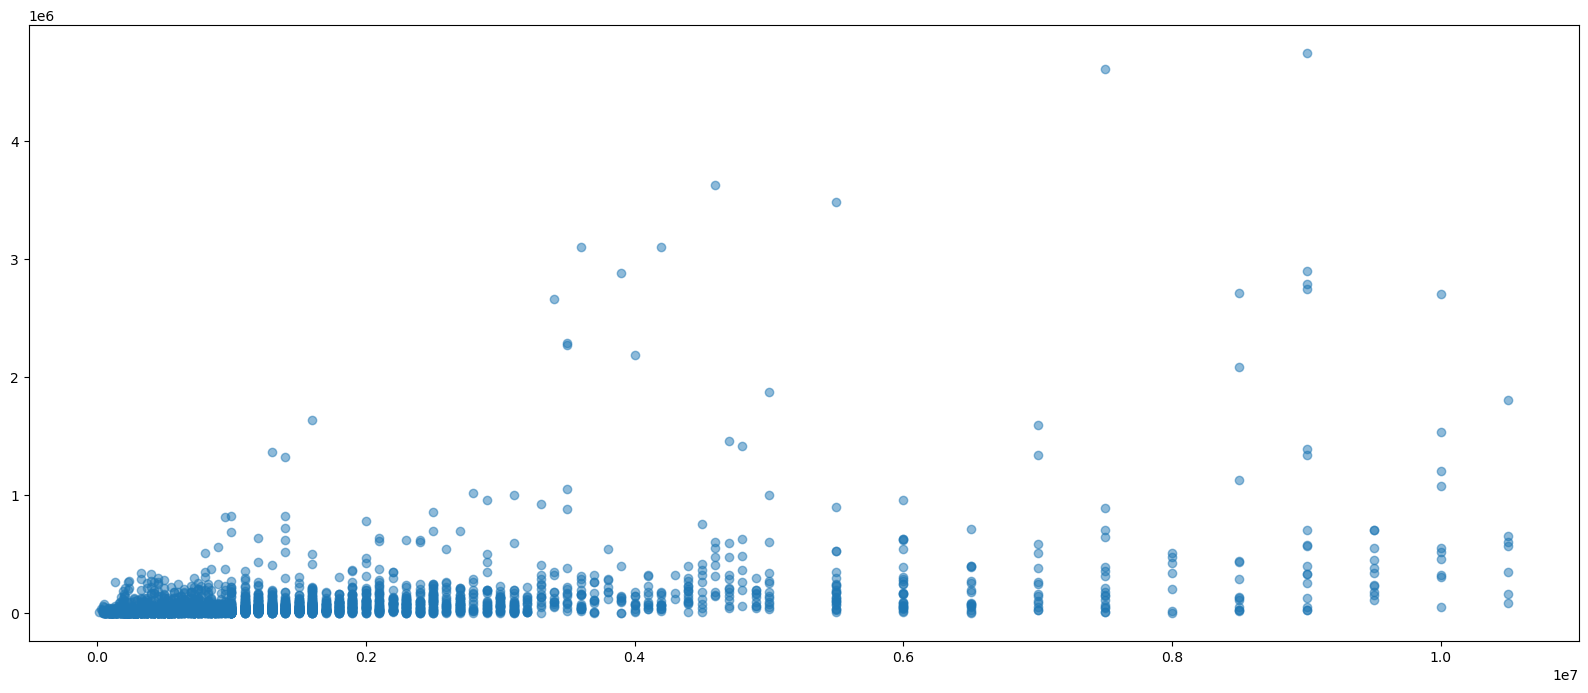

In [28]:
y_test_new = y_test[y_test< np.percentile(y_test,95)]
y_test_pred_new = y_test_pred[y_test< np.percentile(y_test,95)]
print(metrics.mean_absolute_percentage_error(y_test_new,y_test_pred_new) * 100)
plt.figure(figsize=(20, 8))
plt.scatter(y_test_new,np.abs(y_test_new-y_test_pred_new),alpha=0.5)
plt.show()

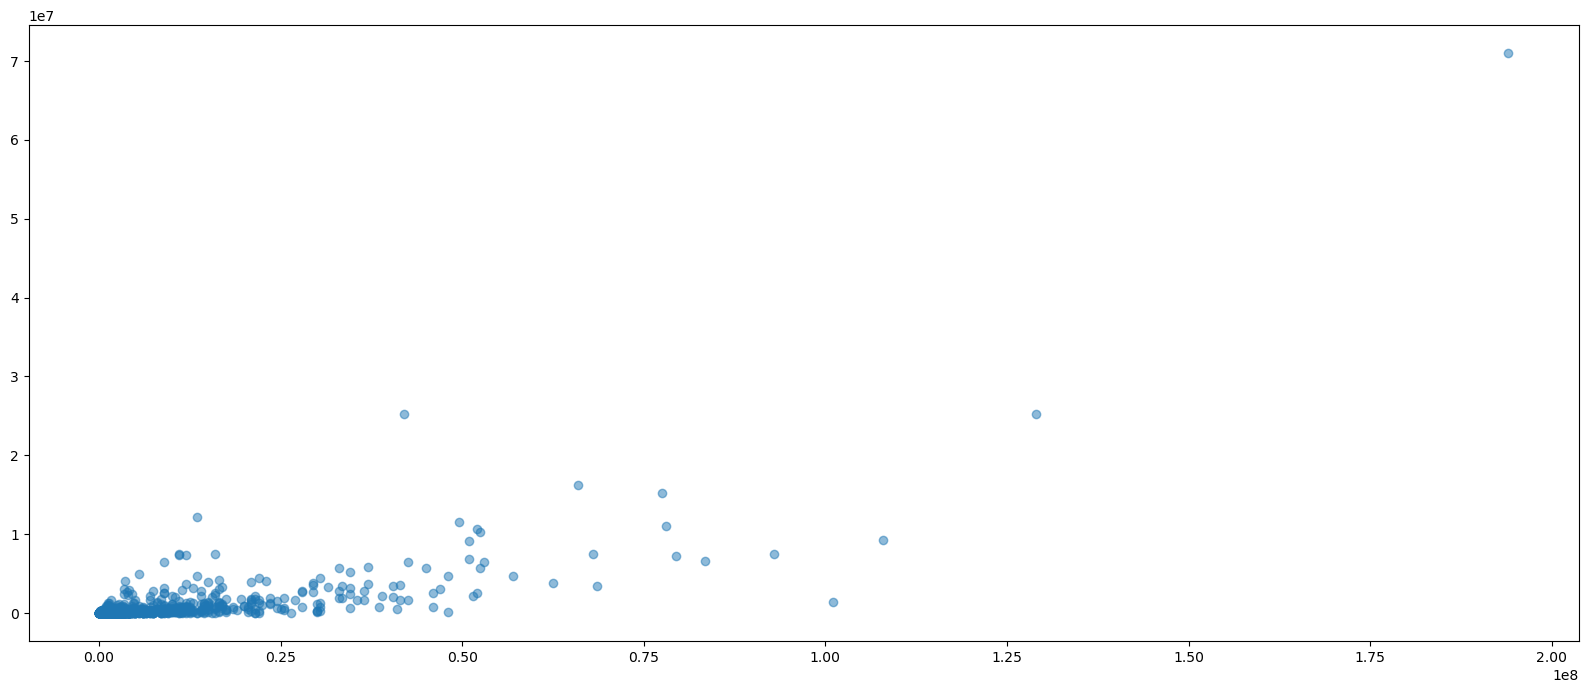

In [73]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test,np.abs(y_test-y_test_pred),alpha=0.5)
plt.show()

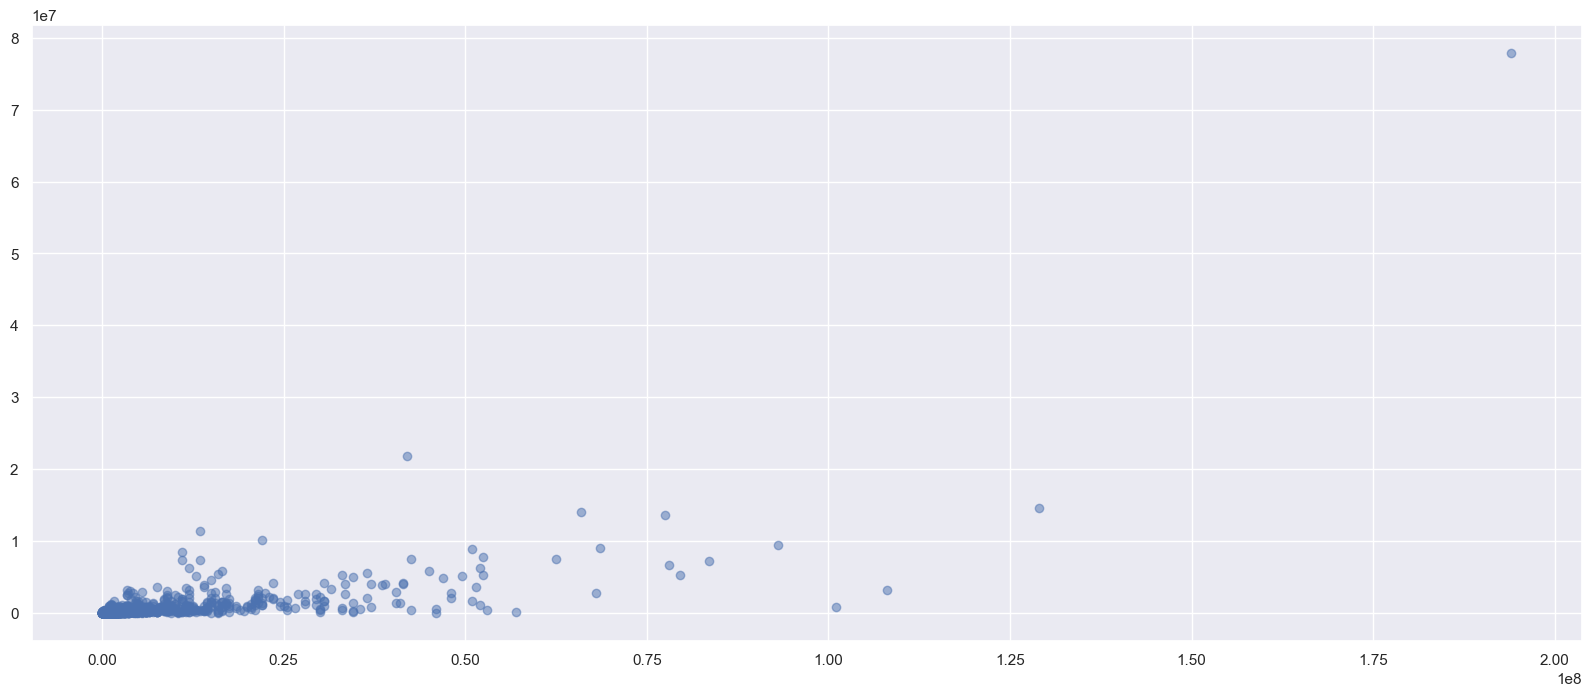

In [115]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test,np.abs(y_test-y_test_pred),alpha=0.5)
plt.show()

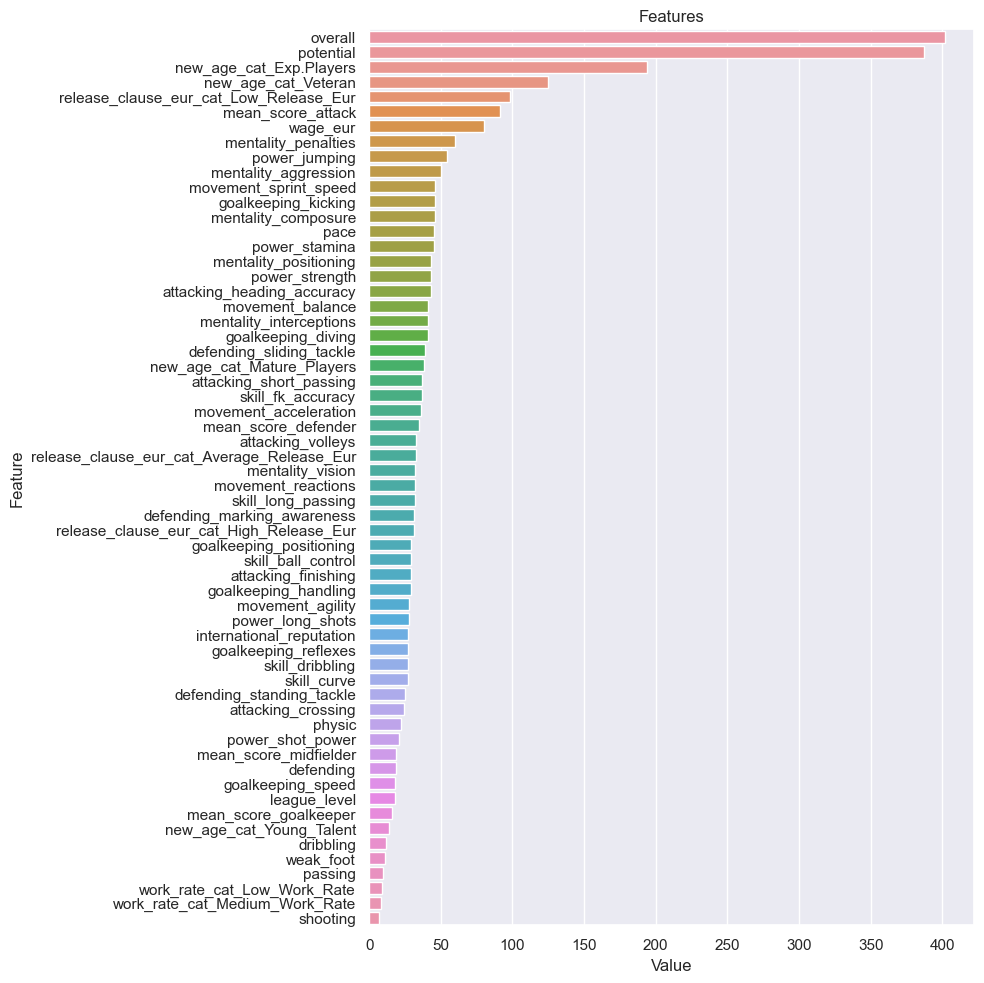

In [116]:
feature_imp = pd.DataFrame({'Value': LightGBM_model.feature_importances_, 
                            'Feature': LightGBM_model.feature_name_})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                 ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

In [117]:
notcol_list = ["goalkeeper","Both_Foot","foot_right","multi_position","first_position_g_1","Face","league_group_top_8_18_league"]

In [118]:
feature_imp.head()

,Value,Feature
0,402,overall
1,387,potential
2,80,wage_eur
3,18,league_level
4,11,weak_foot


In [119]:
feature_imp.sort_values("Value",ascending=False)

,Value,Feature
0,402,overall
1,387,potential
53,194,new_age_cat_Exp.Players
54,125,new_age_cat_Veteran
55,98,release_clause_eur_cat_Low_Release_Eur
47,91,mean_score_attack
2,80,wage_eur
36,60,mentality_penalties
28,54,power_jumping
32,50,mentality_aggression


In [120]:
array = feature_imp.loc[feature_imp["Value"]<=5,"Feature"].values

In [121]:
array

array([], dtype=object)

In [30]:
y_pred = LightGBM_model.predict(X_test)
plotDa = pd.DataFrame({'y_test':y_test,'preds':10**y_pred})

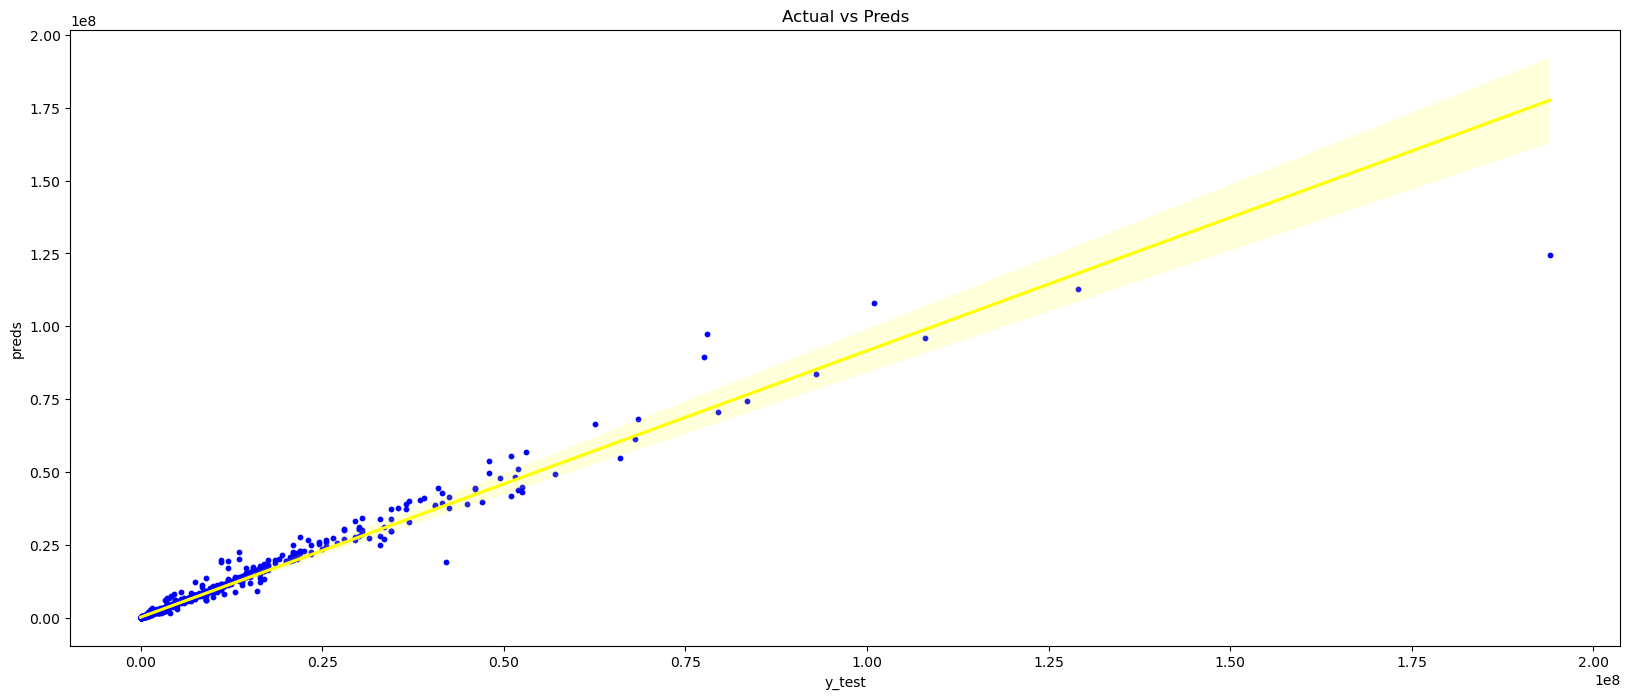

In [31]:
plt.figure(figsize=(20, 8))
plt.title('Actual vs Preds')
sns.regplot(data=plotDa, x='y_test', y='preds',
            scatter_kws=dict(color='blue', s=10, alpha=1),
            line_kws=dict(color='yellow'));

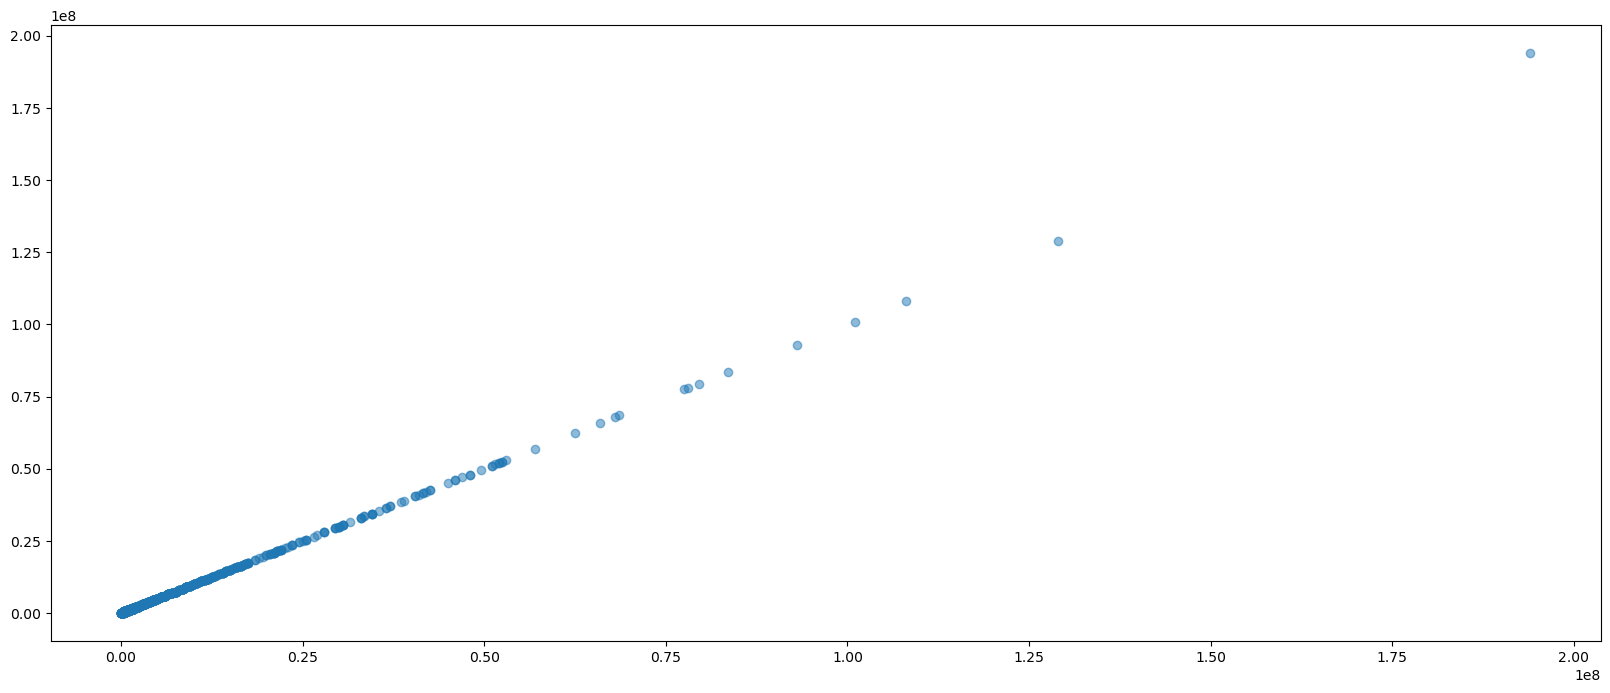

In [32]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test,np.abs(y_test-y_pred),alpha=0.5)
plt.show()